In [1]:
import pandas as pd
import random 
import numpy as np
import re
from scipy.sparse import hstack

In [3]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

In [1]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [5]:
from pre_processamento import pre_processamento

ModuleNotFoundError: No module named 'pre_processamento'

In [ ]:
train = pd.read_csv(r"C:\Users\angel\Desktop\bootcamp\train.tsv", sep='\t')
test = pd.read_csv(r"C:\Users\angel\Desktop\bootcamp\test.tsv", sep='\t')

In [ ]:
train,test = pre_processamento(train,test)

#   Análise estatística

In [ ]:
train.head()

,name,item_condition_id,brand_name,price,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
0,MLB Cincinnati Reds T Shirt Size XL,3,NaN,10.0,1,No description yet,27,Men,Tops,T-shirts,6.0,2018.0
1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,This keyboard is in great condition and works ...,15,Electronics,Computers & Tablets,Components & Parts,3.0,2018.0
2,AVA-VIV Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,14,Women,Tops & Blouses,Blouse,10.0,2018.0
3,Leather Horse Statues,1,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,1,Home,Home Décor,Home Décor Accents,3.0,2018.0
4,24K GOLD plated rose,1,NaN,44.0,0,Complete with certificate of authenticity,13,Women,Jewelry,Necklaces,5.0,2018.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   name               1482535 non-null  object 
 1   item_condition_id  1482535 non-null  int64  
 2   brand_name         849853 non-null   object 
 3   price              1482535 non-null  float64
 4   shipping           1482535 non-null  int64  
 5   item_description   1482531 non-null  object 
 6   stock              1482535 non-null  int32  
 7   gen_cat            1482535 non-null  object 
 8   sub1_cat           1482535 non-null  object 
 9   sub2_cat           1482535 non-null  object 
 10  datetime_month     1475638 non-null  float64
 11  datetime_year      1475638 non-null  float64
dtypes: float64(3), int32(1), int64(2), object(6)
memory usage: 130.1+ MB


In [ ]:
train.head()

,name,item_condition_id,brand_name,price,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
0,MLB Cincinnati Reds T Shirt Size XL,3,NaN,10.0,1,No description yet,27,Men,Tops,T-shirts,6.0,2018.0
1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,This keyboard is in great condition and works ...,15,Electronics,Computers & Tablets,Components & Parts,3.0,2018.0
2,AVA-VIV Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,14,Women,Tops & Blouses,Blouse,10.0,2018.0
3,Leather Horse Statues,1,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,1,Home,Home Décor,Home Décor Accents,3.0,2018.0
4,24K GOLD plated rose,1,NaN,44.0,0,Complete with certificate of authenticity,13,Women,Jewelry,Necklaces,5.0,2018.0


In [ ]:
train.describe()

,item_condition_id,price,shipping,stock,datetime_month,datetime_year
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06,1.475638e+06,1475638.0
mean,1.907380e+00,2.673752e+01,4.472744e-01,1.178544e+01,6.517901e+00,2018.0
std,9.031586e-01,3.858607e+01,4.972124e-01,1.056072e+01,3.194517e+00,0.0
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2018.0
25%,1.000000e+00,1.000000e+01,0.000000e+00,4.000000e+00,4.000000e+00,2018.0
50%,2.000000e+00,1.700000e+01,0.000000e+00,9.000000e+00,7.000000e+00,2018.0
75%,3.000000e+00,2.900000e+01,1.000000e+00,1.700000e+01,9.000000e+00,2018.0
max,5.000000e+00,2.009000e+03,1.000000e+00,9.500000e+01,1.200000e+01,2018.0


In [ ]:
train.isnull().sum()  #necessário valair forma de tratar os valores nulos.

name                      0
item_condition_id         0
brand_name           632682
price                     0
shipping                  0
item_description          4
stock                     0
gen_cat                   0
sub1_cat                  0
sub2_cat                  0
datetime_month         6897
datetime_year          6897
dtype: int64

In [ ]:
train.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'item_condition_id'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'shipping'}>,
        <AxesSubplot:title={'center':'stock'}>],
       [<AxesSubplot:title={'center':'datetime_month'}>,
        <AxesSubplot:title={'center':'datetime_year'}>]], dtype=object)

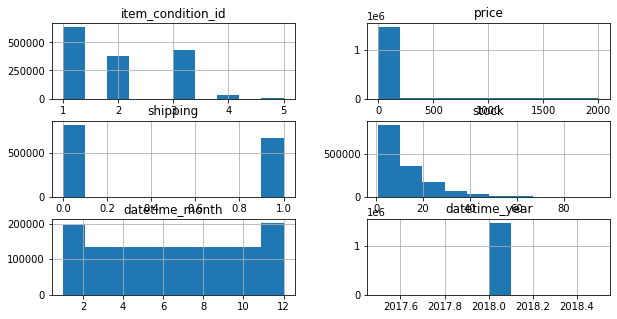

In [ ]:
train.hist(figsize=(10,5))

In [ ]:
X = train.drop("price", axis = 1)
y = train["price"]

#   Split

In [ ]:
#Separação em treino e teste para começarmos as transformaçõs, protegendo nossos dados de validação de possíveis vazamentos. 

Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.4, random_state=10) #Divisão em 80/20

<AxesSubplot:>

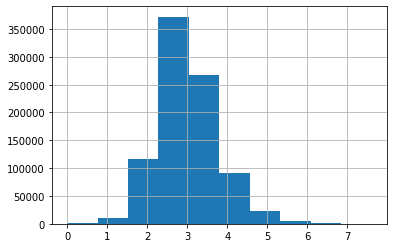

In [ ]:
#Normalizando, com log, o target (price), foi realizado de forma separada para nao terem dados vazados.

ytrain =  np.log1p(ytrain)
yval =  np.log1p(yval)
ytrain.hist()

In [ ]:
Xtrain.head()

,name,item_condition_id,brand_name,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
747051,10W Extra Wide Calf Over The Knee Boots,2,NaN,0,Extra wide calf Ashley Stewart boots only worn...,6,Women,Shoes,Boots,4.0,2018.0
469085,Michael Kors Baby Sandals - Size 1,2,NaN,1,No description yet,9,Kids,Girls 0-24 Mos,Shoes,11.0,2018.0
526083,Nike mens flex run 4 shoes sz 9,3,Nike,0,Gently used nike flex mens running shoes sz 9 ...,4,Men,Shoes,Athletic,9.0,2018.0
80846,FS* (3) Feather Earrings,1,NaN,1,3 pair earrings NEW Free shipping Maybe closin...,5,Women,Jewelry,Earrings,9.0,2018.0
1190544,Boys Summer Bundle 18mo,3,NaN,0,"Stock up for summer, Little man grows fast! BR...",10,Kids,Boys 0-24 Mos,Tops & T-Shirts,3.0,2018.0


In [ ]:
Xval.head()

,name,item_condition_id,brand_name,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
774893,Mario and luigi,1,NaN,1,Girls costumes. I can separate or i will sell ...,1,Kids,Toys,Dress Up & Pretend Play,7.0,2018.0
431736,Air Jordan Baron 9,3,Jordan,0,Sz 10.5 Good preowned condition Includes origi...,4,Men,Shoes,Athletic,7.0,2018.0
1482299,Dooney & Bourke Wallet,3,Dooney & Bourke,1,D&B wallet with credit card slots and back coi...,2,Women,Women's Accessories,Wallets,1.0,2018.0
764342,Lululemon Floral Waistband Speed Tights,3,Lululemon,0,This is a pair of size 6 speed tights in great...,11,Women,Athletic Apparel,"Pants, Tights, Leggings",1.0,2018.0
781985,American Eagle Top,2,American Eagle,0,AEO off the shoulder top size XL,46,Women,Athletic Apparel,Shirts & Tops,2.0,2018.0


#   Pré-processamento

In [ ]:
#Função para "separação" de palavras, ex: Can't -> can not, objetivo de facilitar a limpeza, aonde não serão criadas duas palavras para cant/can not.
# Será feito para diversas palavras com a mesma condição.

def text_preprocess(phrase):
    
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    phrase = re.sub('https?://\S+| www.\S+', '', phrase) #Remoção de qualquer site que possa ter no nosso dataset
    phrase = re.sub("[^a-zA-Z0-9' \n\.]", '', phrase)  #excluindo tudo o que não for letra e numero.
    
    phrase = re.sub(' +', ' ', phrase) #exclusão de espaços extras, ex: "eu    vou" -> "eu vou"

    phrase = phrase.lower() #passando para letra minúscula.

   
    return phrase

In [ ]:
Xtrain["name"] = Xtrain["name"].apply(lambda x: text_preprocess(x))

In [ ]:
Xtrain["item_description"] = Xtrain["item_description"].astype(str)

In [ ]:
Xtrain["item_description"] = Xtrain["item_description"].apply(lambda x: text_preprocess(x))

In [ ]:
Xtrain

,name,item_condition_id,brand_name,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
747051,10w extra wide calf over the knee boots,2,NaN,0,extra wide calf ashley stewart boots only worn...,6,Women,Shoes,Boots,4.0,2018.0
469085,michael kors baby sandals size 1,2,NaN,1,no description yet,9,Kids,Girls 0-24 Mos,Shoes,11.0,2018.0
526083,nike mens flex run 4 shoes sz 9,3,Nike,0,gently used nike flex mens running shoes sz 9 ...,4,Men,Shoes,Athletic,9.0,2018.0
80846,fs 3 feather earrings,1,NaN,1,3 pair earrings new free shipping maybe closin...,5,Women,Jewelry,Earrings,9.0,2018.0
1190544,boys summer bundle 18mo,3,NaN,0,stock up for summer little man grows fast bran...,10,Kids,Boys 0-24 Mos,Tops & T-Shirts,3.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...
1348317,maryland sweatshirt,2,Old Varsity Brand,0,good condition. new,12,Men,Sweats & Hoodies,"Sweatshirt, Pullover",11.0,2018.0
1154171,candie is grey printed bikini,3,Candie's,0,candie is grey printed bikini. top is thicker ...,12,Women,Swimwear,Two-Piece,12.0,2018.0
617841,under armour sweatshirt smp cold gear,3,Under Armour,0,under armour sweatshirt smp cold gear black si...,2,Men,Sweats & Hoodies,Hoodie,5.0,2018.0
1048548,luminess air pro black system,2,NaN,1,luminess air pro black 3speed system. this is ...,7,Beauty,Tools & Accessories,Makeup Brushes & Tools,1.0,2018.0


In [ ]:
vec = TfidfVectorizer(stop_words='english', ngram_range=(1,2)) #vetorização, com stop word. 

vce_xtrain_name = vec.fit_transform(Xtrain["name"])
vce_xtrain_descrip = vec.fit_transform(Xtrain["item_description"])

In [ ]:
vce_xtrain_descrip

<889521x3156300 sparse matrix of type '<class 'numpy.float64'>'
	with 25660284 stored elements in Compressed Sparse Row format>

In [ ]:
ohe = OneHotEncoder(handle_unknown="error")

#aplicação dummy nas colunas categóricas.

ohe_condition = ohe.fit_transform(Xtrain[["item_condition_id",   
                                         "shipping",
                                         "brand_name",
                                         "gen_cat",
                                         "sub1_cat",
                                         "sub2_cat", 
                                         "datetime_month"]])

In [ ]:
ohe_condition

<889521x5174 sparse matrix of type '<class 'numpy.float64'>'
	with 6226647 stored elements in Compressed Sparse Row format>

In [ ]:
#juntando cada matrix gerada por cada pré-processamento

x_train = hstack([
                 (ohe_condition),
                 (vce_xtrain_name),
                 (vce_xtrain_descrip)
                                    ] ) 

In [ ]:
x_train

<889521x4035570 sparse matrix of type '<class 'numpy.float64'>'
	with 37962634 stored elements in Compressed Sparse Row format>